In [1]:
import pandas as pd
from decouple import config
import ast
from collections import defaultdict
import matplotlib.pyplot as plt
ROOT_PATH       = config('ROOT_PATH')
DATA_RAW_PATH   = config('DATA_RAW_PATH')
DATA_PROCESSED_PATH = config('DATA_PROCESSED_PATH')

In [2]:
data_foursquare = pd.read_csv(ROOT_PATH+DATA_RAW_PATH+'dataframe_foursquare_center_SP.csv')
data_quintoAndar = pd.read_csv(ROOT_PATH+DATA_PROCESSED_PATH+'dataframe_quintoAndar_preprocessed.csv')

In [3]:
data_foursquare['categories'] = data_foursquare['categories'].apply(lambda x: ast.literal_eval(x))
data_foursquare['geocodes'] = data_foursquare['geocodes'].apply(lambda x: ast.literal_eval(x))

In [4]:
def get_cat_attributes (dataframe:pd.DataFrame)->pd.DataFrame :
    '''
        This method creates a dataframe with categories attributes

        Parameters:
            dataframe : A dataframe with data to filter
    '''
    dict_ = defaultdict(list)
    for idx in range(len(dataframe)) :
        id_ = dataframe['idx_'][idx]
        id_location = dataframe['categories'][idx][0]['id']
        type_location = dataframe['categories'][idx][0]['name']
        latitude = dataframe['geocodes'][idx]['main']['latitude']
        longitude = dataframe['geocodes'][idx]['main']['longitude']
        dict_['idx'].append(id_)
        dict_['id_location'].append(id_location)
        dict_['type_location'].append(type_location)
        dict_['latitude'].append(latitude)
        dict_['longitude'].append(longitude)
    return pd.DataFrame.from_dict(dict_)

In [5]:
df_places = get_cat_attributes(data_foursquare)
df_places[['idx','type_location']].value_counts(ascending=True).head(60)

idx  type_location           
352  History Museum              1
331  Movie Theater               1
     Comedy Club                 1
330  Rock Club                   1
     Movie Theater               1
     Indie Theater               1
     History Museum              1
     Fair                        1
     Dance Hall                  1
713  Roller Rink                 1
330  Amusement Park              1
329  Theater                     1
     Public Art                  1
     Movie Theater               1
     Comedy Club                 1
713  Strip Club                  1
328  Public Art                  1
     Museum                      1
     Movie Theater               1
     Comedy Club                 1
327  Museum                      1
     Movie Theater               1
     Gaming Cafe                 1
     Fair                        1
331  Music Venue                 1
327  Dance Hall                  1
332  Amusement Park              1
     Art Gallery         

<AxesSubplot:>

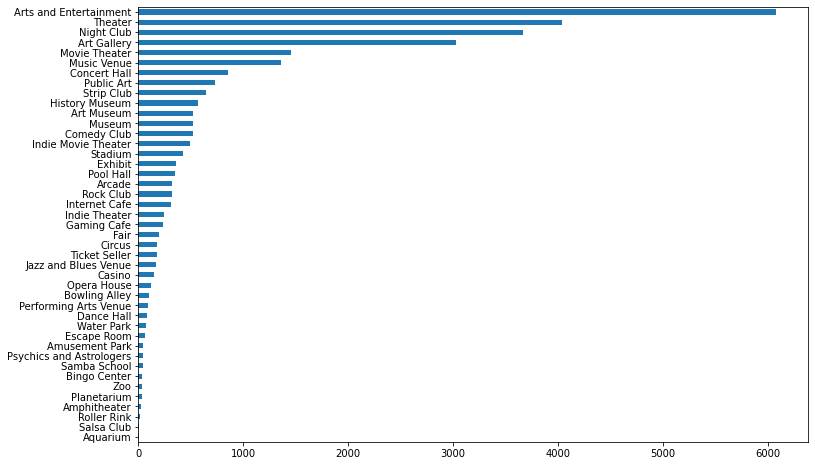

In [6]:
df_places['type_location'].value_counts(ascending=True).plot(kind='barh',figsize=(12,8))

In [7]:
columns = sorted(df_places['type_location'].unique())